In [1]:
import sys
sys.path.insert (0 , '/home/arpit/study/ML/github')

In [2]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#This is going to introduce to select only the relevand features
#This helps to know which are the features that are important
#All the models are supervised learning , that means they need the target data as well

In [4]:
#unviriate statistics
#In this we compute , wether there is a significant relationship between the feature and the target
#Then the feature with the highest confidence are selected
#This is also known as analysis of variance (ANOVA)
#These test are univariate , so they do not capture the intercation in between the features
#They are very fast
#In order to select the feature we need to select KBest which selects the KBest features
#SelectPercentile to select a fixed percentage
#We will apply this on the cancer data set and add some noise to it and then try to find the best features
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
print("Shape of original data : " ,cancer.data.shape)               #there are 30 features
#Now we are going to add the noise to it

rng = np.random.RandomState(0)
noise = rng.normal (size = (cancer.data.shape[0] , 50))

#Adding tnoise to the original data set
X_noise = np.hstack([cancer.data , noise])
print("Shape of noised data : " , X_noise.shape)    #so we added 50 more features that are just noise

#splitting the data set
X_train , X_test , y_train , y_test = train_test_split(X_noise , cancer.target , random_state = 0)

#now using the feature selection 
select = SelectPercentile(percentile = 50) #This is to select only the 50 % features
select.fit(X_train , y_train)

X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

#printing the shape of the data after feature selection
print("Shape after feature selection : " , X_train_selected.shape)
#This show 50% of the features are selected

Shape of original data :  (569, 30)
Shape of noised data :  (569, 80)
Shape after feature selection :  (426, 40)


In [5]:
#We can see which feature are selected using the get_support method
print("Selected features : \n" , select.get_support())

Selected features : 
 [ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True False False False  True  True  True
  True False False False False  True False False False False False False
 False False  True False  True  True False False  True False False  True
 False False False False False False  True False  True False False False
 False  True False False False False False False]


Text(0.5,0,'Sample index')

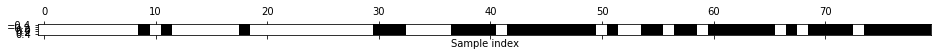

In [6]:
#plotting it on the graph
mask = select.get_support()
mask = mask.reshape(1 , 80)    #this is to convert it into a row string
plt.matshow(mask , cmap = 'gray')
plt.xlabel("Sample index")
#As you can see most of the selcted fetures are the original features and the noise features are removed

In [7]:
#now compare the performance of the logistic regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(X_train , y_train)

print("Test accuracy without selection : " , reg.score(X_test , y_test))

reg = LogisticRegression().fit(X_train_selected , y_train)
print("Test accuracy after selection : " , reg.score(X_test_selected , y_test))

#There is a improvement in the performance but this is not very significant

Test accuracy without selection :  0.9440559440559441
Test accuracy after selection :  0.9370629370629371


In [8]:
#model based feature selection
#It uses a supervised learning model to learn the importance of each features
#The model that is used for feature selection need not be the same as the model that is applied
#The feature selection need to provide some measure of importance of how the features are selected
#tree based model provides feature_importances_
#regression model provides coef, features with small coef magnitude are not that important
#in model based feature selection , the interactions are captured

#implementing
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(
        RandomForestClassifier(n_estimators = 100 , random_state = 42) , 
        threshold = 'median')    #to change the threshold use 1.25 * median

#Here we select the thershold to be the median so only half the features are going to be selected

In [9]:
select.fit(X_train , y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

print("Shape of original data : " , X_train.shape)
print("After selection data : " , X_train_selected.shape)

Shape of original data :  (426, 80)
After selection data :  (426, 40)


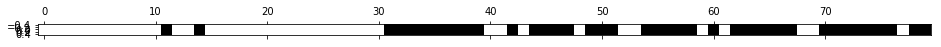

In [10]:
#now have a look at the features
mask = select.get_support()
mask = mask.reshape(1, 80)
plt.matshow(mask ,  cmap = 'gray')

#since the model is very powerful all the starting 30 features are selected
#since we are selecting 40 features so some noise features are also selected

In [11]:
#Now seeing the performance
reg = LogisticRegression().fit(X_train_selected , y_train)
print("Test score : " , reg.score(X_test_selected , y_test))
#there is an improvement in the performance

Test score :  0.951048951048951


In [12]:
#iterative feature selection
#In this we are going to use more than model for the feature selection
#This is the strongest feature selection
#These models are computationally expensive since the series of models are build in this case
#The method we are going to use here is recursiveFeatureElimination or RFE
#we need to give some model for features selection

from sklearn.feature_selection import RFE
select = RFE(
        RandomForestClassifier(n_estimators = 100 , random_state = 42) , 
        n_features_to_select = 40)
select.fit(X_train , y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

Text(0.5,0,'Features')

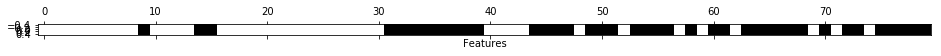

In [13]:
mask = select.get_support().reshape(1 , -1)
plt.matshow(mask , cmap = 'gray')
plt.xlabel("Features")

In [14]:
reg = LogisticRegression().fit(X_train_selected , y_train)
print("Test accuracy  : " , reg.score(X_test_selected , y_test))

Test accuracy  :  0.9300699300699301


In [15]:
#note that feature selection is not likely to provide very large gains